In [45]:
import time
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

params = {
    # 'font.family': 'Inter',
    'font.family': 'sans-serif',
    'legend.fontsize': 'x-small',
    'axes.labelsize': 'x-small',
    'axes.titlesize': 'x-small',
    'xtick.labelsize': 'x-small',
    'ytick.labelsize': 'x-small',
    # 'figure.figsize': (3.0, 1.7),
}
plt.rcParams.update(params)
plt.clf()

def parse_timestamp(timestamp_str):
    # 2024-04-12 14:45:40.00857
    # to datetime object
    return pd.to_datetime(timestamp_str, format='%Y-%m-%d %H:%M:%S.%f')

def parse_func_name(func_name_str):
    # Func:'load_index' => "load_index"
    str_l = func_name_str.split(":")
    if "completed" in func_name_str:
        return func_name_str
    return str_l[-1][:]

def parse_latency(time_str):
    return float(time_str[:-1])

def create_gantt_chart(load_index_hbars, search_index_hbars, figsize=(6, 1), ax=None, vline=True):
    return_ax = False
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        return_ax = True

    bar_width = 0.5
    bar_gap = 0.0
    # [(x, length), ()], (y, bar_width)
    ax.broken_barh(load_index_hbars[:], (1, bar_width), facecolors =('darkorange'))
    ax.broken_barh(search_index_hbars[:], (1+bar_width+bar_gap, bar_width), facecolors =('green'))

    ax.set_yticks([1+bar_width/2, 1+bar_width+bar_gap+bar_width/2], ['load', 'search'])
    # ax.grid(True, alpha=0.5)

    if vline:
        last_x = search_index_hbars[-1][0]+search_index_hbars[-1][1]
        ax.axvline(x=last_x, color='black', linestyle='--', alpha=1)

    if return_ax:
        return fig, ax
    return ax

log_headers = ["timesteps", "start_time", "action", "latency", "file_path", "num_query"]

<Figure size 640x480 with 0 Axes>

In [46]:
def construct_load_search_bars(fpths, log_headers):
    df = pd.read_csv(fpths, header=None)
    df.columns = log_headers
    df["action"] = df["action"].map(parse_func_name)
    df["latency"] = df["latency"].map(parse_latency)
    df['start_time'] = df['start_time'] - df['start_time'][0]
    load_index_hbars = []
    search_index_hbars = []
    for i, row in df[df["action"] == "load_index"].iterrows():
        load_index_hbars.append((row["start_time"], row["latency"]))
    for i, row in df[df["action"] == "query_index"].iterrows():
        search_index_hbars.append((row["start_time"], row["latency"]))
    return load_index_hbars, search_index_hbars

In [4]:
st = "index_async"
total_idx = 1000
mem_list = []
for i in np.arange(0, 1.1, 0.1):
    mem_list.append(int(total_idx * i))

diverse_list = []
for i in np.arange(0, 1.1, 0.1):
    diverse_list.append(i)

for m in diverse_list:
    # if m==0: m=1
    fp = "../logs/st_{}_{}_batch.log".format(st, m)
    print(fp)
    try:
        l, s = construct_load_search_bars(fp, log_headers)
        fig, ax = create_gantt_chart(l, s, ax=None)
        fig.tight_layout()
        fig.savefig("tmp/st_{}_{}_batch.pdf".format(st, m))
        plt.show()
    except:
        pass

../logs/st_index_async_0.0_batch.log
../logs/st_index_async_0.1_batch.log
../logs/st_index_async_0.2_batch.log
../logs/st_index_async_0.30000000000000004_batch.log
../logs/st_index_async_0.4_batch.log
../logs/st_index_async_0.5_batch.log
../logs/st_index_async_0.6000000000000001_batch.log
../logs/st_index_async_0.7000000000000001_batch.log
../logs/st_index_async_0.8_batch.log
../logs/st_index_async_0.9_batch.log
../logs/st_index_async_1.0_batch.log


In [110]:
# st_query = {1: 153.61743285,
#             100: 24.90386106,
#             200: 9.29645746,
#             300: 8.65851302,
#             400: 8.57795881,
#             500: 8.80642473,
#             600: 9.36062568,
#             700: 8.60914782,
#             800: 8.61208765,
#             900: 8.47547708,
#             1000: 8.74988525}

# st_index = {
#     1: 0.81666721,
#     100: 0.81620806,
#     200: 0.77503797,
#     300: 0.77260581,
#     400: 0.74566446,
#     500: 0.75055806,
#     600: 0.82484493,
#     700: 0.78199837,
#     800: 0.75145365,
#     900: 0.75596289,
#     1000: 0.77090119
# }

# st_index_async = {
#     1: 0.73935232,
#     100: 0.55480419,
#     200: 0.55719207,
#     300: 0.51906040,
#     400: 0.53654169,
#     500: 0.55858433,
#     600: 0.56641869,
#     700: 0.56285429,
#     800: 0.55761006,
#     900: 0.53367700,
#     1000: 0.53802682
# }

st_index = {
  2: 0.81237061,
  10: 0.80492424,
  20: 0.85505778,
  30: 0.80925883,
  40: 0.79384483,
  50: 0.80806565,
  60: 0.78390244,
  70: 0.81885252,
  80: 0.80486187,
  90: 0.76605449,
  100: 0.81274959,
  110: 0.80033717,
  120: 0.76950316,
  130: 0.76292698,
  140: 0.80647462,
  150: 0.79592599
}
st_index_async = {
  2: 0.79033189,
  10: 0.76767256,
  20: 0.80207499,
  30: 0.76050302,
  40: 0.72184867,
  50: 0.68826636,
  60: 0.66692416,
  70: 0.63135366,
  80: 0.65039594,
  90: 0.62567668,
  100: 0.61817084,
  110: 0.62717767,
  120: 0.59988544,
  130: 0.62862914,
  140: 0.62398477,
  150: 0.58546614
}
st_query = {
  2: 213.69721973,
  10: 207.84166055,
  20: 147.38321909,
  30: 85.6083321,
  40: 57.75951941,
  50: 36.27733554,
  60: 24.10368417,
  70: 17.60215008,
  80: 15.61973379,
  90: 12.59036233,
  100: 11.70871196,
  110: 11.93052936,
  120: 11.78932149,
  130: 11.83641724,
  140: 12.12419985,
  150: 11.77848282
}


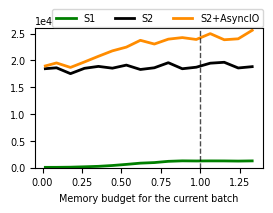

In [147]:
# compute tput query per sec
num_query = 15000
max_mem = 113

tput_query = {}
for k, v in st_query.items():
    k = k / max_mem
    tput_query[k] = num_query / v

tput_index = {}
for k, v in st_index.items():
    k = k / max_mem
    tput_index[k] = num_query / v

tput_index_async = {}
for k, v in st_index_async.items():
    k = k / max_mem
    tput_index_async[k] = num_query / v

# plot tput
linewidth = 2
plt.figure(figsize=(2.86, 2.3))
plt.plot(list(tput_query.keys()), list(tput_query.values()), label="S1", color='green', linewidth=linewidth, linestyle='-')
plt.plot(list(tput_index.keys()), list(tput_index.values()), label="S2", color='black', linewidth=linewidth)
plt.plot(list(tput_index_async.keys()), list(tput_index_async.values()), label="S2+AsyncIO", color='darkorange', linewidth=linewidth)

# vertical line
plt.axvline(x=1, color='black', linestyle='--', alpha=0.7, linewidth=linewidth-1)

# 1 row, 3 columns legend
plt.legend(loc='upper center', bbox_to_anchor=(0.54, 1.17), ncol=3)
plt.xlabel("Memory budget for the current batch")
# plt.ylabel("Throughput (query/sec)")

# make y-axis use scientific notation
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 26000)

plt.tight_layout()
plt.savefig("tmp/tput_memV2.pdf")
plt.show()

In [76]:
# query diversity

# st_query_diversity = {
#     0.0: 9.43839952,
#     0.1: 10.93816875,
#     0.2: 10.70763876,
#     0.3: 11.00994852,
#     0.4: 12.05738855,
#     0.5: 11.16794533,
#     0.6: 11.23277323,
#     0.7: 13.44501039,
#     0.8: 11.27035343,
#     0.9: 11.34796564,
#     1.0: 11.30618735
# }
# st_index_diversity = {
#     0.0: 1.14276421,
#     0.1: 1.95855080,
#     0.2: 1.83449230,
#     0.3: 1.89141592,
#     0.4: 1.88526955,
#     0.5: 1.89281210,
#     0.6: 1.88903056,
#     0.7: 1.90273121,
#     0.8: 1.96149863,
#     0.9: 1.92830793,
#     1.0: 1.94605508
# }
# st_index_async_diversity = {
#     0.0: 0.78801695,
#     0.1: 1.55864374,
#     0.2: 1.40223565,
#     0.3: 1.39977139,
#     0.4: 1.40591503,
#     0.5: 1.38263734,
#     0.6: 1.41171381,
#     0.7: 1.45423789,
#     0.8: 1.47577877,
#     0.9: 1.46389665,
#     1.0: 1.49676419
# }

num_query = 10000
st_index_async_diversity =  {
  0.0: 0.45217028,
  0.002: 0.74394389,
  0.004: 1.07313673,
  0.006: 1.14235309,
  0.008: 1.16521932,
  0.01: 1.41975398,
  0.05: 2.06885823,
  # 0.1: 2.0455493
}
st_index_diversity = {
  0.0: 0.58636054,
  0.002: 0.91676583,
  0.004: 1.22866432,
  0.006: 1.43039795,
  0.008: 1.54039739,
  0.01: 1.66379801,
  0.05: 2.11181633,
  # 0.1: 2.10928185
}
st_query_diversity = {
  0.0: 8.230743,
  0.002: 9.00914463,
  0.004: 9.83213899,
  0.006: 9.8606782,
  0.008: 10.14792845,
  0.01: 11.27789476,
  0.05: 12.15238989,
  # 0.1: 12.48343554
}

# convert to query per sec
tput_query_diversity = {}
for k, v in st_query_diversity.items():
    tput_query_diversity[float(str(k)[:5])] = num_query / v

tput_index_diversity = {}
for k, v in st_index_diversity.items():
    tput_index_diversity[float(str(k)[:5])] = num_query / v

tput_index_async_diversity = {}
for k, v in st_index_async_diversity.items():
    tput_index_async_diversity[float(str(k)[:5])] = num_query / v
  
tput_index_async_diversity

{0.0: 22115.562305421754,
 0.002: 13441.873956381307,
 0.004: 9318.477059302591,
 0.006: 8753.860857504224,
 0.008: 8582.075346982747,
 0.01: 7043.4738277683855,
 0.05: 4833.583981247473}

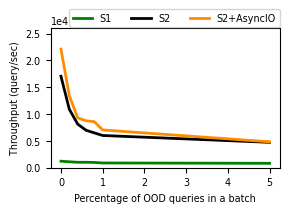

In [140]:
linewidth = 2 

# plot
plt.figure(figsize=(3, 2.3))
plt.plot(np.array(list(tput_query_diversity.keys()))*100, list(tput_query_diversity.values()), label="S1", color='green', linewidth=linewidth, linestyle='-')
plt.plot(np.array(list(tput_index_diversity.keys()))*100, list(tput_index_diversity.values()), label="S2", color='black', linewidth=linewidth)
plt.plot(np.array(list(tput_index_async_diversity.keys()))*100, list(tput_index_async_diversity.values()), label="S2+AsyncIO", color='darkorange', linewidth=linewidth)

# set xticks
# plt.xticks(np.arange(0, 0.051, 0.001))
# plt.xlim([0., 2])

# 1 row, 3 columns legend
plt.legend(loc='upper center', bbox_to_anchor=(0.54, 1.17), ncol=3)
plt.xlabel("Percentage of OOD queries in a batch")
plt.ylabel("Throughput (query/sec)")

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.ylim(0, 26000)

plt.tight_layout()
plt.savefig("tmp/tput_diversityV2.pdf")
plt.show()

In [62]:
np.arange(0, 0.05, 0.001)

array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049])

In [155]:
# compute percentage tput change compared to previous

def random_floats(size, low=0, high=1, seed=None):
    # if seed is not None: np.random.seed(seed)
    return [np.random.uniform(low, high) for _ in range(size)]

random_floats(1, -1., 1)[0]

-0.12596262729744656

In [39]:
from pprint import pprint

st = {"idx1": [1,2,3,4,5], 
     "idx2": [1,2,3,4], 
     "idx3": [1,2,3],
     "idx4": [1,2],
     "idx5": [1]}

pprint(st)
print()

dram_idx_dict = {"idx5": "idx3obj",
     "idx3": "idx3obj"}


dram_idxs = []
for k, v in dram_idx_dict.items():
    if k in st:
        dram_idxs.append((k,st[k]))
        del st[k]

# sort by length, small batch first, so can finish faster and leave more space for loading
dram_idxs = sorted(dram_idxs, key=lambda x: len(x[1]), reverse=False)
print(dram_idxs)

dram_idxs.extend(list(st.items()))
dram_idxs = dict(dram_idxs)
print()
print(dram_idxs)

for k, v in dram_idxs.items():
    print(k, v)

{'idx1': [1, 2, 3, 4, 5],
 'idx2': [1, 2, 3, 4],
 'idx3': [1, 2, 3],
 'idx4': [1, 2],
 'idx5': [1]}

[('idx5', [1]), ('idx3', [1, 2, 3])]

{'idx5': [1], 'idx3': [1, 2, 3], 'idx1': [1, 2, 3, 4, 5], 'idx2': [1, 2, 3, 4], 'idx4': [1, 2]}
idx5 [1]
idx3 [1, 2, 3]
idx1 [1, 2, 3, 4, 5]
idx2 [1, 2, 3, 4]
idx4 [1, 2]


In [159]:
mrs = [0., 0., 0., 0., 0., 0.001, 0.001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0]

# randomly pick 100 numbers from mrs
mrs = np.random.choice(mrs, 100)

for m in mrs:
    print(m, end=" ")

0.5 0.0 0.05 0.003 0.01 0.1 0.0 0.0 0.007 0.0 0.0 0.3 0.0 0.05 0.01 1.0 0.0 0.008 0.003 0.05 0.0 0.0 1.0 0.004 0.0 0.1 0.01 0.01 0.0 0.001 0.001 0.0 0.001 0.008 0.009 0.0 0.0 0.005 0.0 0.001 0.0 0.002 0.005 0.008 0.007 1.0 0.0 0.006 0.01 0.004 0.008 0.3 0.001 0.05 0.0 0.002 0.001 0.003 0.0 0.3 0.01 0.002 0.004 0.3 0.05 0.0 0.001 0.006 0.0 0.004 0.0 0.01 0.05 0.001 0.002 0.1 0.004 0.0 0.0 0.0 0.0 0.001 0.001 0.003 0.001 0.001 0.006 0.009 0.05 0.001 0.004 0.007 0.006 0.1 0.0 1.0 0.0 0.003 0.001 0.009 

In [165]:
num_vectors = 5
num_dimensions = 10

means = np.random.uniform(-1, 1, num_dimensions)
std_devs = np.random.uniform(0.1, 0.5, num_dimensions)

random_vectors = np.random.normal(loc=means, scale=std_devs, size=(num_vectors, num_dimensions))
random_vectors

array([[-0.50609855,  0.66979523,  0.60987398, -0.45835665,  0.73662304,
         0.8451849 , -0.31101712,  0.88128424, -1.01592426, -0.05161432],
       [-0.98912432,  0.74251552,  1.14152318, -0.60369246,  1.03033683,
         0.798217  , -0.10057506,  0.94896762, -1.13677691,  0.0886852 ],
       [-0.51189982,  0.62583771,  0.15146203, -0.41414029,  0.65436549,
         0.88748433,  0.10050452,  0.91195914, -0.53616477,  0.04973931],
       [-0.67329124,  0.87485977,  0.88462579, -0.79152217,  0.74556711,
         0.73964042,  0.49228249,  0.92574173, -0.7942726 ,  0.30053131],
       [-0.60519201,  0.82494135,  0.92715649, -0.98266714,  0.77851486,
         0.92105497,  0.1187413 ,  0.95705611, -1.08000988, -0.28286586]])

# Serving Tputs

In [215]:
# read file line by line
lru_times = []
lru_tputs = []
lru_avg_tputs = []

fpth = "../logs/lru_tput.tmp"
with open(fpth, 'r') as f:
    for line in f:
        # print(line[:-1])
        t = float(line.split(" ")[1])
        tput = float(line.split(" ")[4])
        avg_tput = float(line.split(" ")[7])
        lru_times.append(t)
        lru_tputs.append(tput)
        lru_avg_tputs.append(avg_tput)

In [216]:
# read file line by line
lfu_times = []
lfu_tputs = []
lfu_avg_tputs = []

fpth = "../logs/lfu_tput.tmp"
with open(fpth, 'r') as f:
    for line in f:
        t = float(line.split(" ")[1])
        tput = float(line.split(" ")[4])
        avg_tput = float(line.split(" ")[7])
        lfu_times.append(t)
        lfu_tputs.append(tput)
        lfu_avg_tputs.append(avg_tput)

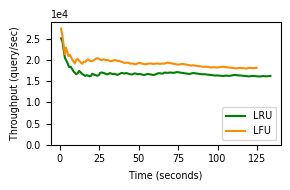

In [253]:
# plot
plt.figure(figsize=(3.1, 2))
# plt.plot(lru_times, lru_tputs, label="Tput", color='green', linewidth=1, linestyle='-')
plt.plot(lru_times, lru_avg_tputs, label="LRU", color='green', linewidth=1.5, linestyle='-')

# plt.plot(lfu_times, lfu_tputs, label="Tput", color='darkorange', linewidth=1, linestyle='-')
plt.plot(lfu_times, lfu_avg_tputs, label="LFU", color='darkorange', linewidth=1.5)


plt.ylim(0, 29000)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.legend(loc='lower right')
plt.xlabel("Time (seconds)")
plt.ylabel("Throughput (query/sec)")
plt.tight_layout()
plt.savefig("tmp/lru_lfu_tput.pdf")
plt.show()